# 🌟 **Giám sát bảo hộ lao động tại công trường bằng YOLO** 🌟  
### 📚 **Đồ án môn học:** Thị giác máy tính
## 📝 **Thông tin nhóm**  
<style>
  table {
    width: 100%;
    border-collapse: collapse;
    font-size: 16px; /* Tăng kích thước chữ */
  }
  th, td {
    border: 1px solid #ddd;
    padding: 10px;
    text-align: left;
  }
  th {
    background-color: #f2f2f2;
  }
</style>
<div>  
<table style="width:100%; font-size: 24px; border-collapse: collapse; text-align: left;">  
  <tr style="border-bottom: 1px solid #ddd;">  
    <th style="padding: 8px;">Họ và Tên</th>  
    <th style="padding: 8px;">MSSV</th>  
  </tr>  
  <tr>  
    <td style="padding: 8px;">Trần Nguyên Bình</td>  
    <td style="padding: 8px;">21E1010005</td>  
  </tr>  
  <tr>  
    <td style="padding: 8px;">Lê Bá Quốc Trung</td>  
    <td style="padding: 8px;">21E1020020</td>  
  </tr>  
</table>  
</div>  

---
## 💡 **Giới thiệu**  
**YOLO (You Only Look Once)** là một thuật toán mạnh mẽ trong lĩnh vực thị giác máy tính, được thiết kế đặc biệt để nhận diện đối tượng trong hình ảnh và video theo thời gian thực. Với khả năng xử lý nhanh và độ chính xác cao, YOLO đã trở thành lựa chọn phổ biến cho các bài toán giám sát và phân tích hình ảnh.

Trong đồ án này, YOLO sẽ được sử dụng để phát hiện và nhận diện các đối tượng liên quan đến an toàn lao động trong ảnh. Hệ thống sẽ dựa trên tập dữ liệu đã được nhóm gán nhãn sẵn, giúp phát hiện nhanh các vi phạm quy tắc an toàn lao động tại công trường.

---
## 🎯 **Mục tiêu:**
1. Chuẩn bị và xử lý dữ liệu hình ảnh.  
2. Nghiên cứu và xây dựng mô hình CNN.    
3. Huấn luyện, tinh chỉnh mô hình và đánh giá hiệu suất.

### **1\. Giới thiệu tập dữ liệu**

### 2\. Chuẩn bị môi trường

In [1]:
# Cài đặt thư viện
!pip install -q roboflow
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 42.7 MB/s eta 0:00:00


In [2]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [3]:
!nvidia-smi

Fri Dec 27 03:06:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="1YWULeEHQvXSrJWvOr4v")
project = rf.workspace("ecommerce-clothes").project("worksite-safety-monitoring")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Worksite-Safety-Monitoring-1 in yolov8:: 100%|██████████| 8678/8678 [00:01<00:00, 5838.31it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Kiểm tra tập dữ liệu

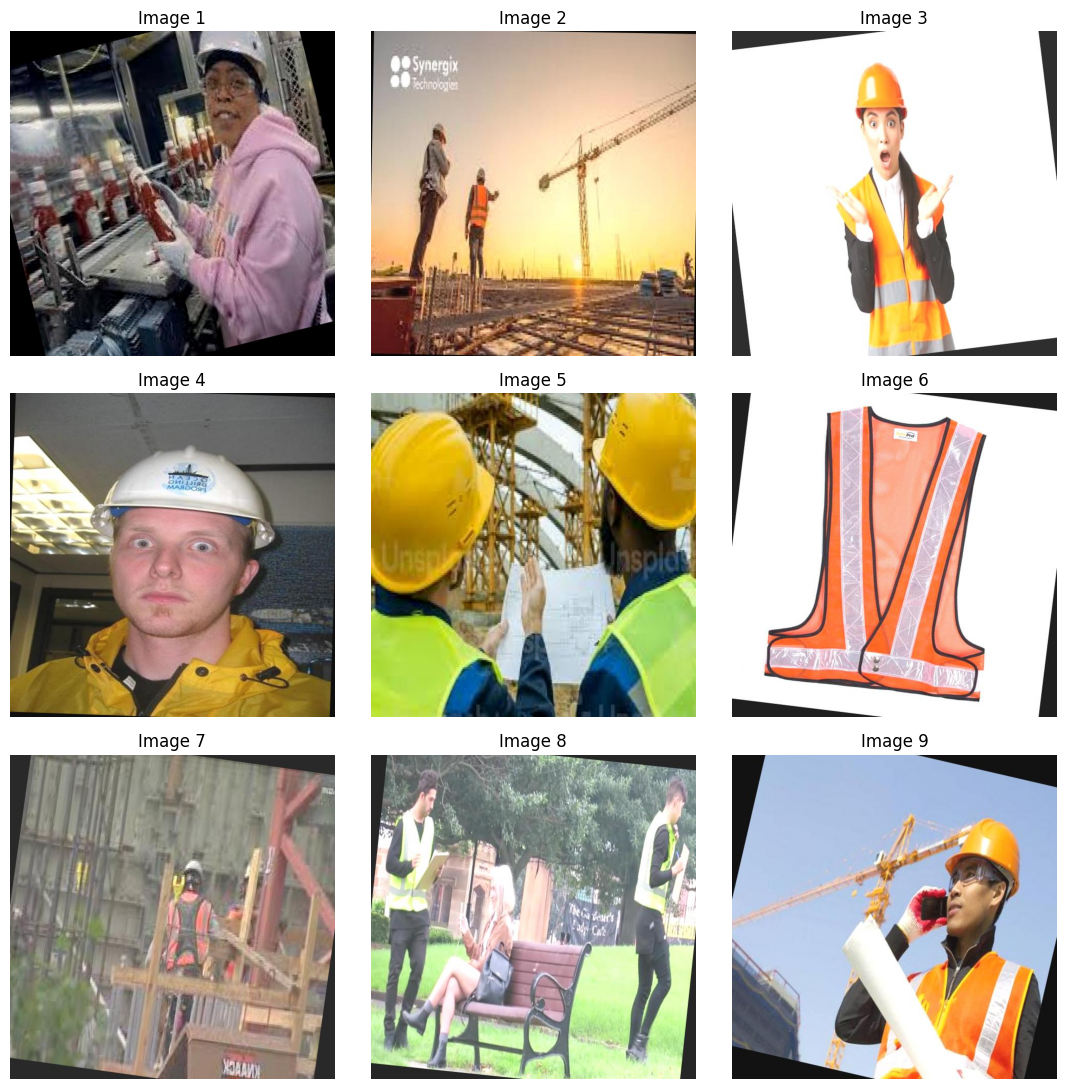

In [6]:
training_images_dir = "/content/Worksite-Safety-Monitoring-1/train/images"
num_samples = 9
image_files = os.listdir(training_images_dir)
#kqt
rand_images = random.sample(image_files, num_samples) # Display 9 random images

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(training_images_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
for image in rand_images:
    img_path = os.path.join(training_images_dir, image)
    img = plt.imread(img_path)
    print(f"{image}: {img.shape}")

232_jpg.rf.ce878e2033a299dbf4071b031784e7e7.jpg: (640, 640, 3)
584_jpg.rf.9d99939219c711a75c007f4ef6b58e6c.jpg: (640, 640, 3)
584_jpg.rf.ecafe87c0f877551093988bd21ece8a9.jpg: (640, 640, 3)
385_jpg.rf.5df3aee7a24e78abadc33292afefe488.jpg: (640, 640, 3)
247_jpg.rf.ea49d7c4a85488bbf3f043ebaea7a12a.jpg: (640, 640, 3)
643_jpg.rf.0729a2e52c00b028485076c8e53350ba.jpg: (640, 640, 3)
469_jpg.rf.d45f72a725ad77dc6cc1a2066aa68e66.jpg: (640, 640, 3)
592_jpg.rf.16ad20f5eec46222d775709e7f8b54cb.jpg: (640, 640, 3)
79_jpg.rf.a5c7231537e4af0546e2ee36b5107744.jpg: (640, 640, 3)


### **3\. Huấn luyện mô hình**

#### **3\.1 Lựa chọn mô hình YOLO**

In [8]:
from ultralytics import YOLO
yolov8_model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 289MB/s]


#### **3\.2 Cấu hình huấn luyện**

```yaml
names:
- construction-vest
- helmet
- person
nc: 3
roboflow:
  license: MIT
  project: worksite-safety-monitoring
  url: https://universe.roboflow.com/ecommerce-clothes/worksite-safety-monitoring/dataset/1
  version: 1
  workspace: ecommerce-clothes
test: ../test/images
train: ../train/images
val: ../valid/images
```

#### **3\.3 Tiến hành huấn luyện**

In [9]:
yolov8_results = yolov8_model.train(
    data="/content/Worksite-Safety-Monitoring-1/data.yaml",
    epochs = 50,
    batch = -1,
    optimizer = 'auto'
)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Worksite-Safety-Monitoring-1/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 99.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 285MB/s]


AMP: checks passed ✅


train: Scanning /content/Worksite-Safety-Monitoring-1/train/labels... 4094 images, 3 backgrounds, 0 corrupt: 100%|██████████| 4094/4094 [00:02<00:00, 1768.97it/s]


train: New cache created: /content/Worksite-Safety-Monitoring-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 63, len(boxes) = 24716. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.281         65.05         420.4        (1, 3, 640, 640)                    list
     3011433       16.39

train: Scanning /content/Worksite-Safety-Monitoring-1/train/labels.cache... 4094 images, 3 backgrounds, 0 corrupt: 100%|██████████| 4094/4094 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 63, len(boxes) = 24716. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Worksite-Safety-Monitoring-1/valid/labels... 159 images, 1 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<00:00, 774.95it/s]

val: New cache created: /content/Worksite-Safety-Monitoring-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0007968750000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.6G      1.515       2.23      1.624         92        640: 100%|██████████| 41/41 [01:14<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all        159        784      0.711      0.223      0.367      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.3G      1.398      1.392       1.52        154        640: 100%|██████████| 41/41 [01:10<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]

                   all        159        784      0.509      0.529      0.522      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.77G      1.405      1.332      1.538        165        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.37s/it]

                   all        159        784      0.527      0.553      0.509      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.8G      1.405      1.295      1.531         97        640: 100%|██████████| 41/41 [01:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all        159        784      0.468      0.521      0.462       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.7G      1.368      1.194      1.511        140        640: 100%|██████████| 41/41 [01:14<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all        159        784      0.636      0.533       0.56      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      14.6G      1.357      1.159      1.502        122        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all        159        784      0.634      0.609      0.631      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      14.2G      1.323      1.091      1.479        190        640: 100%|██████████| 41/41 [01:13<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all        159        784      0.751      0.694      0.737      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      15.1G      1.304      1.066      1.468        160        640: 100%|██████████| 41/41 [01:11<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all        159        784      0.729      0.619      0.695      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      15.6G      1.292      1.029      1.457        152        640: 100%|██████████| 41/41 [01:11<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all        159        784      0.817      0.722      0.785      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.6G      1.275      1.001      1.443        145        640: 100%|██████████| 41/41 [01:11<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all        159        784      0.779      0.713      0.779      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      14.7G      1.261     0.9797      1.439        128        640: 100%|██████████| 41/41 [01:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]

                   all        159        784      0.768      0.667      0.714      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.2G       1.26     0.9703      1.428        112        640: 100%|██████████| 41/41 [01:12<00:00,  1.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all        159        784      0.786      0.716      0.782      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      15.5G      1.239     0.9394       1.42        178        640: 100%|██████████| 41/41 [01:15<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all        159        784      0.756       0.76      0.791      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      14.1G      1.228     0.9211      1.408        178        640: 100%|██████████| 41/41 [01:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all        159        784      0.793      0.713       0.78      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      14.3G      1.218      0.906      1.396        139        640: 100%|██████████| 41/41 [01:13<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all        159        784      0.814      0.751      0.815      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      15.5G      1.204     0.8781      1.394        140        640: 100%|██████████| 41/41 [01:13<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]

                   all        159        784       0.82      0.775      0.845      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        14G      1.188     0.8731      1.379        129        640: 100%|██████████| 41/41 [01:12<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all        159        784      0.874      0.744      0.828      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.7G      1.186     0.8641       1.37        261        640: 100%|██████████| 41/41 [01:13<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.07s/it]

                   all        159        784      0.793      0.749      0.796      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      15.5G      1.175     0.8468      1.373        184        640: 100%|██████████| 41/41 [01:13<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all        159        784      0.841      0.738      0.833      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        14G      1.154     0.8352      1.358        166        640: 100%|██████████| 41/41 [01:13<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.05s/it]

                   all        159        784      0.846      0.736      0.837      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      15.6G       1.15     0.8254      1.353        134        640: 100%|██████████| 41/41 [01:13<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all        159        784       0.82      0.773      0.827      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        15G      1.154     0.8233      1.359        214        640: 100%|██████████| 41/41 [01:14<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all        159        784      0.821       0.78       0.84      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        14G      1.129     0.8095      1.342        144        640: 100%|██████████| 41/41 [01:14<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all        159        784      0.826      0.761       0.83       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      14.1G      1.137      0.802      1.344        127        640: 100%|██████████| 41/41 [01:14<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all        159        784      0.833      0.749      0.823      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      14.9G      1.119     0.7836      1.329        142        640: 100%|██████████| 41/41 [01:17<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all        159        784      0.847      0.791      0.855      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.7G      1.106     0.7691      1.325        123        640: 100%|██████████| 41/41 [01:13<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.70s/it]

                   all        159        784      0.872      0.783      0.866      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.9G      1.101      0.767      1.325        137        640: 100%|██████████| 41/41 [01:14<00:00,  1.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all        159        784      0.824      0.828      0.869      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.9G      1.093     0.7585      1.318        137        640: 100%|██████████| 41/41 [01:13<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all        159        784      0.861      0.786      0.855      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.6G       1.09     0.7493       1.32        155        640: 100%|██████████| 41/41 [01:16<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all        159        784      0.867      0.785      0.854      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.2G       1.07     0.7363      1.303        156        640: 100%|██████████| 41/41 [01:14<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all        159        784      0.864      0.803      0.863      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      15.4G      1.072     0.7241      1.295        165        640: 100%|██████████| 41/41 [01:16<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]

                   all        159        784      0.879       0.79      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      14.9G       1.06     0.7231      1.294        128        640: 100%|██████████| 41/41 [01:17<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all        159        784      0.868      0.795      0.862      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      15.3G      1.058     0.7165      1.289        122        640: 100%|██████████| 41/41 [01:18<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]

                   all        159        784      0.869      0.792       0.86      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.6G      1.036     0.7049      1.282        164        640: 100%|██████████| 41/41 [01:16<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all        159        784      0.876       0.79       0.87       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      15.5G      1.032     0.7048      1.276        176        640: 100%|██████████| 41/41 [01:16<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all        159        784      0.869      0.803       0.87      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        14G       1.03     0.6977      1.272        151        640: 100%|██████████| 41/41 [01:14<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

                   all        159        784      0.883      0.777       0.87      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      14.2G      1.025     0.6947      1.268        210        640: 100%|██████████| 41/41 [01:14<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all        159        784      0.869      0.818      0.876      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      15.3G      1.019     0.6847      1.264        113        640: 100%|██████████| 41/41 [01:15<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all        159        784      0.857      0.808      0.874      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      14.5G       1.01     0.6727      1.252        158        640: 100%|██████████| 41/41 [01:15<00:00,  1.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all        159        784      0.908      0.782       0.88      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.4G      1.006     0.6679      1.258        159        640: 100%|██████████| 41/41 [01:17<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all        159        784      0.864      0.819      0.875      0.616


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      15.5G     0.9836     0.5799      1.259        101        640: 100%|██████████| 41/41 [01:18<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all        159        784      0.883      0.784      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      15.2G     0.9601     0.5427      1.246         84        640: 100%|██████████| 41/41 [01:11<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all        159        784      0.863      0.825       0.87      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      14.6G     0.9272     0.5295      1.226         96        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all        159        784      0.881      0.795       0.88      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      15.3G     0.9328     0.5251      1.229         70        640: 100%|██████████| 41/41 [01:06<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]

                   all        159        784      0.892      0.797      0.866      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      15.3G     0.9142     0.5183      1.216        110        640: 100%|██████████| 41/41 [01:08<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all        159        784       0.87      0.825      0.877      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.1G     0.9067      0.511      1.208         71        640: 100%|██████████| 41/41 [01:09<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all        159        784      0.889      0.809      0.877      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      14.7G     0.8918     0.5034      1.197         93        640: 100%|██████████| 41/41 [01:09<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all        159        784      0.912      0.786      0.875       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      15.1G     0.8834     0.4992      1.194        129        640: 100%|██████████| 41/41 [01:08<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

                   all        159        784       0.89      0.817      0.877      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      15.3G     0.8751     0.4909      1.189        114        640: 100%|██████████| 41/41 [01:11<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all        159        784      0.888      0.815      0.879      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.7G     0.8605     0.4865       1.18         67        640: 100%|██████████| 41/41 [01:08<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all        159        784      0.909      0.802      0.882      0.624



50 epochs completed in 1.090 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


                   all        159        784      0.909      0.802      0.882      0.625
     construction-vest        103        164      0.913      0.817      0.893      0.642
                helmet         83        196      0.921      0.821      0.901      0.653
                person        130        424      0.893      0.768      0.852       0.58
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train


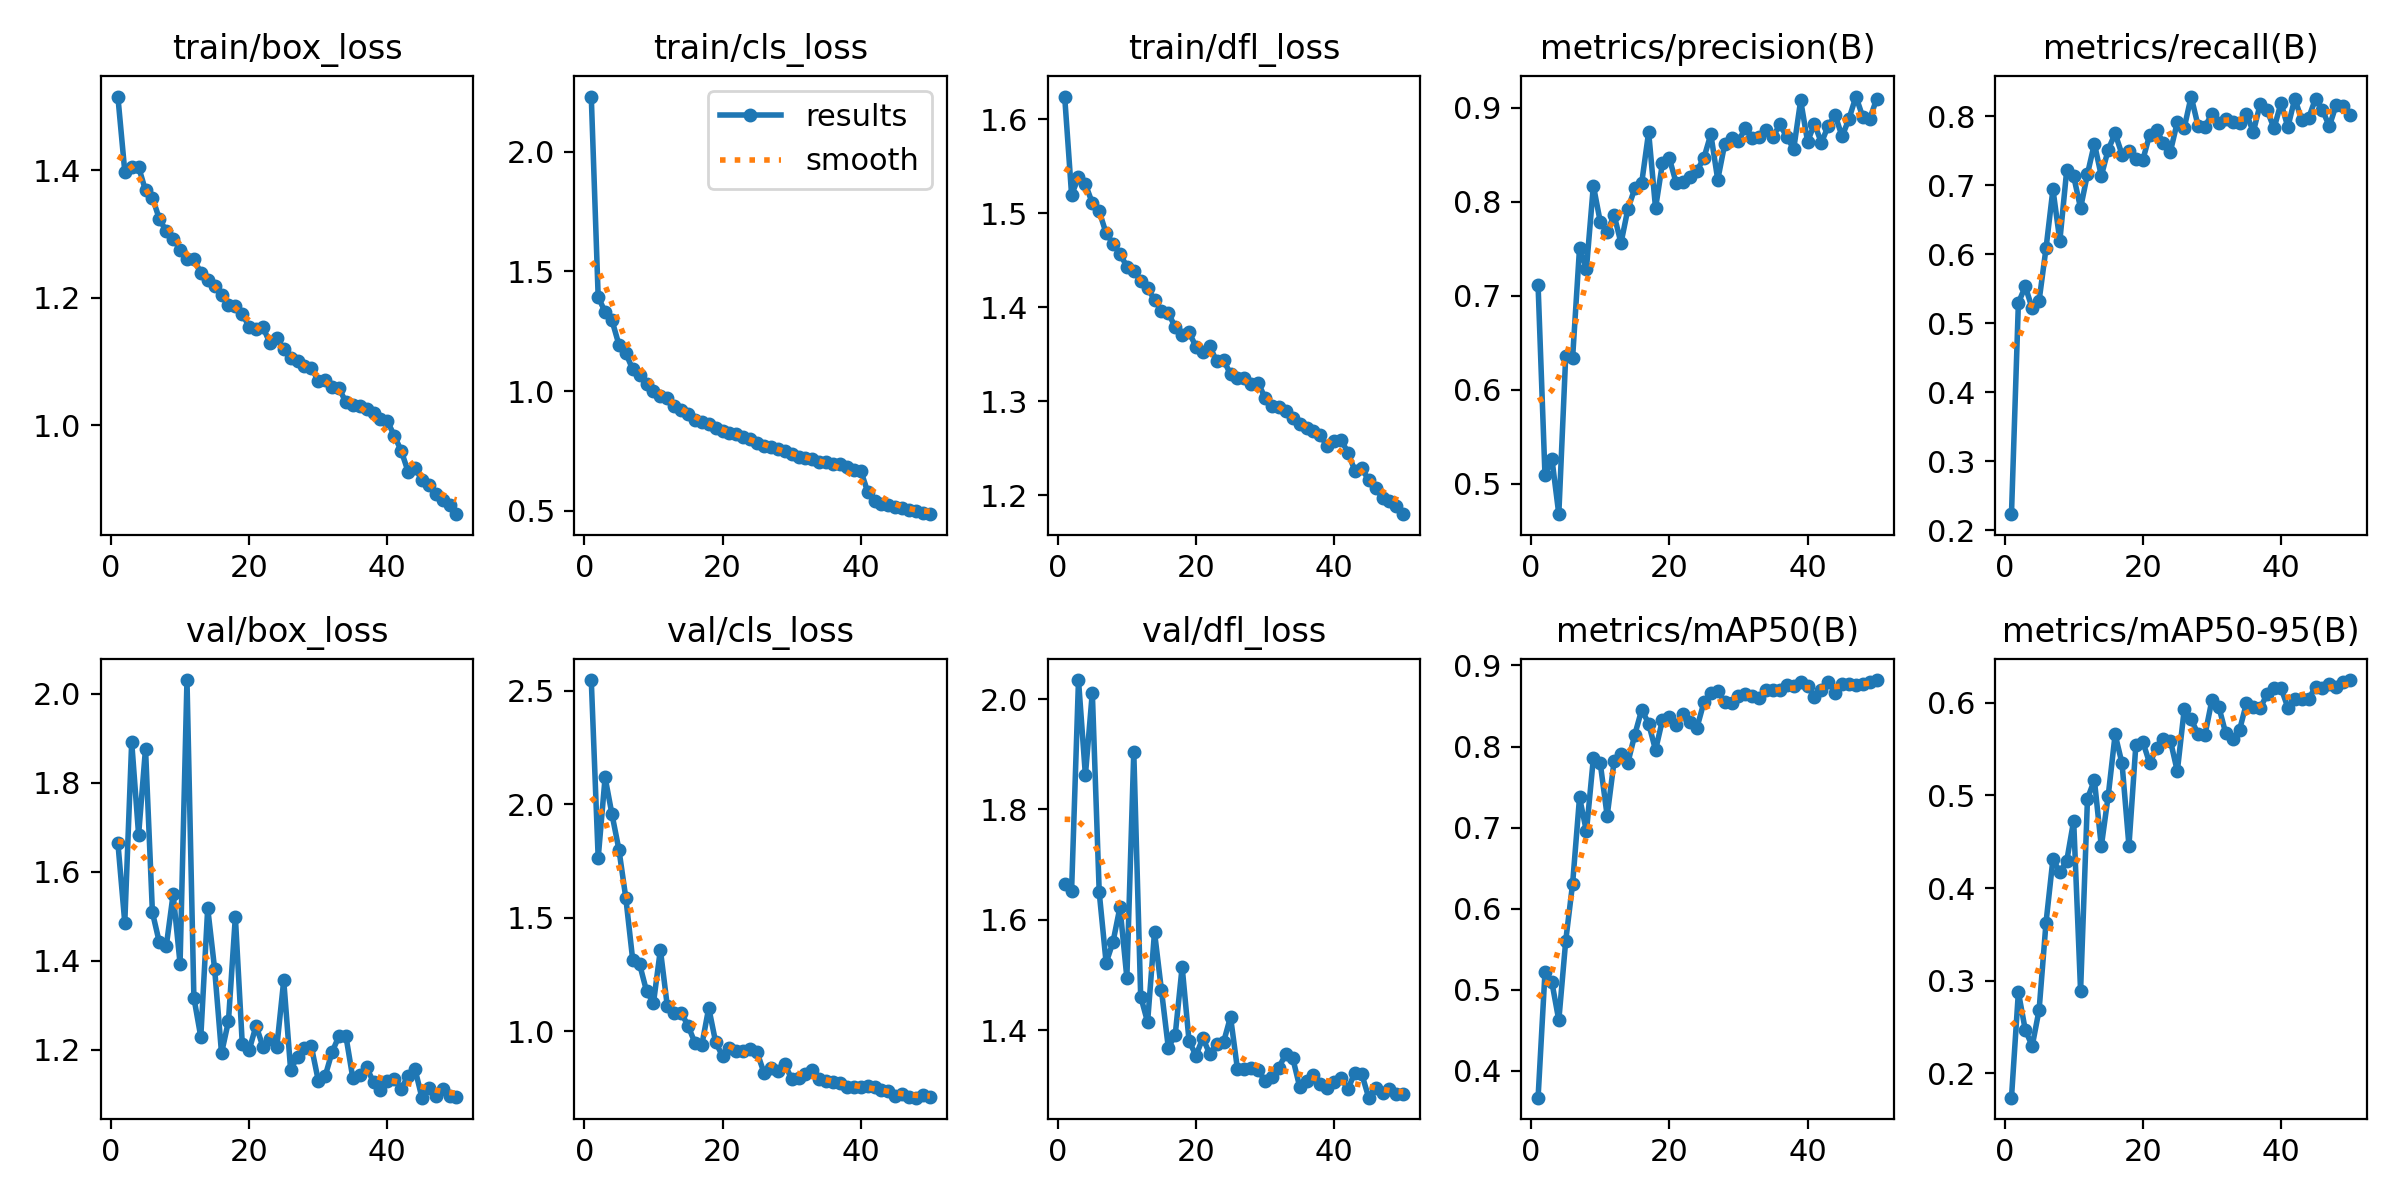

In [10]:
# Một số hình ảnh huấn luyện
from IPython.display import display, Image
model_path = "/content/runs/detect/train"
Image(filename=f'{ model_path }/results.png', width=1200)

### **4\. Đánh giá mô hình**

In [16]:
from ultralytics import YOLO
trained_yolov8_model = YOLO(f"{ model_path }/weights/best.pt")

**Cấu hình:** ultralytics không hỗ trợ phương thức test riêng. Do đó, ta cần config lại validation path thành test set path và sử dụng phương thức val()
Trong file data.yaml:
```yaml
train: ../train/images
val: ../test/images
```

In [15]:
results_yolov8 = trained_yolov8_model.val(data="/content/Worksite-Safety-Monitoring-1/data.yaml", imgsz=640)
results_yolov8.results_dict

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Worksite-Safety-Monitoring-1/test/labels.cache... 80 images, 1 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


                   all         80        345      0.891      0.793      0.858      0.605
     construction-vest         43         56      0.904      0.875      0.924      0.652
                helmet         41         90      0.921      0.811      0.861      0.648
                person         71        199      0.849      0.693      0.788      0.515
Speed: 0.6ms preprocess, 8.3ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val3


{'metrics/precision(B)': 0.891273281714806,
 'metrics/recall(B)': 0.7931928159315094,
 'metrics/mAP50(B)': 0.8577081219212127,
 'metrics/mAP50-95(B)': 0.6049174745460212,
 'fitness': 0.6301965392835404}

### **5\. Ứng dụng mô hình**


0: 640x640 2 construction-vests, 1 helmet, 2 persons, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


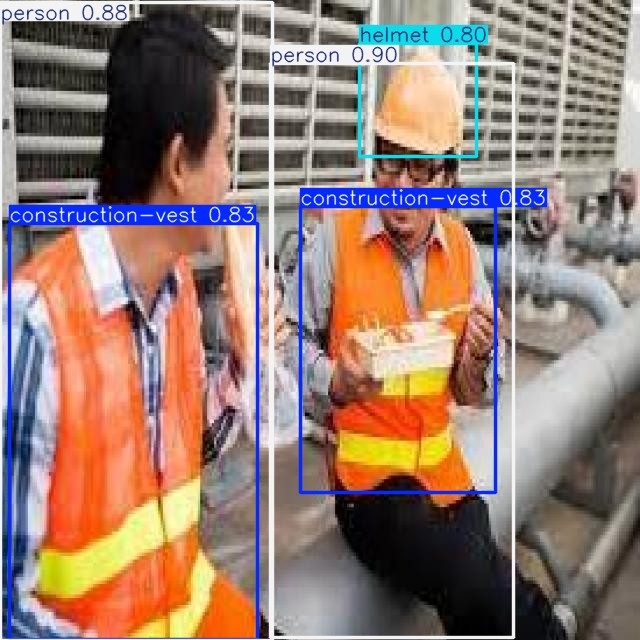

In [19]:
image_path = f"/content/Worksite-Safety-Monitoring-1/test/images/5_jpg.rf.1b3427ddbfde7dc8b26b67f86212f993.jpg"
results = trained_yolov8_model([image_path])

for result in results:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb
    result.show()
    result.save(filename="result.png")